#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

## Visualize code

In [2]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


## Loading the dataset

In [3]:
#import urllib.request
testCsv_url = 'https://raw.githubusercontent.com/ItamarFriedman/ML2/main/TestHW1.csv'
testDataset = pd.read_csv(testCsv_url)

trainCsv_url = 'https://raw.githubusercontent.com/ItamarFriedman/ML2/main/TrainHW1.csv'
trainDataset = pd.read_csv(trainCsv_url)


In [4]:
print(testDataset.shape)
print(trainDataset.shape)

(250, 32)
(1000, 32)


# Part 1

In [5]:
partOneTemp = trainDataset[["PCR_01", "PCR_03"]]
partOneTemp.head()

PCR_01    PCR_03
0 -0.685681  0.945362
1  0.035668 -0.721394
2  0.963040 -0.460868
3 -0.529018 -0.762484
4  0.117661  0.167442

## Q1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


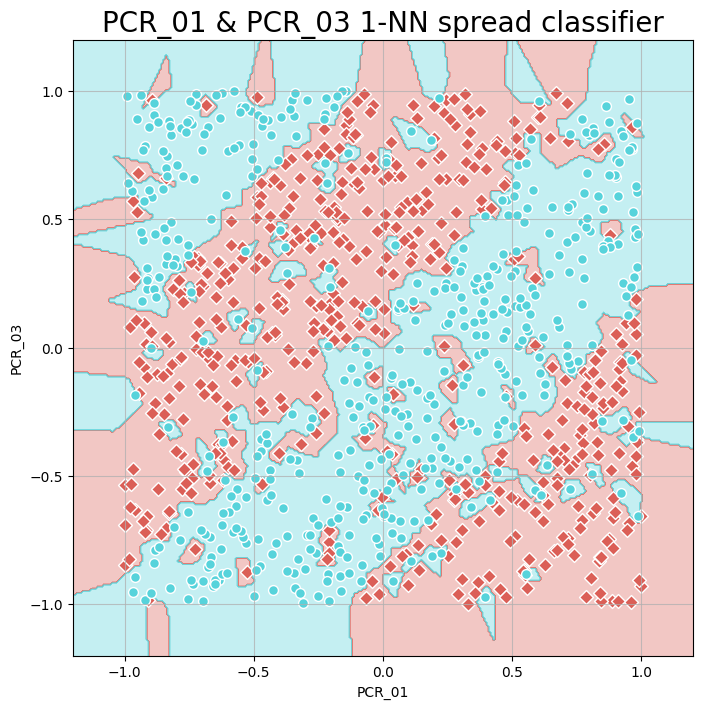

In [6]:
oneNN = KNN(1)
oneNN.fit(partOneTemp, trainDataset["spread"])
visualize_clf(oneNN, partOneTemp, trainDataset["spread"], "PCR_01 & PCR_03 1-NN spread classifier", "PCR_01", "PCR_03")

## Q2

In [7]:
values = list(range(1, 20, 2)) + list(range(20,871,85))
estimators = [KNN(k) for k in values]
Scores = [(kNN.n_neighbors, cross_validate(kNN, partOneTemp, trainDataset["spread"], cv=8, return_train_score = True)) for kNN in estimators]
Scores

[(1,
  {'fit_time': array([0.01306629, 0.01660061, 0.00984907, 0.00592494, 0.01756692,
          0.02935195, 0.0058248 , 0.01257086]),
   'score_time': array([0.07805896, 0.06949878, 0.02964139, 0.02985454, 0.02672029,
          0.07773638, 0.02376747, 0.0448575 ]),
   'test_score': array([0.768, 0.76 , 0.712, 0.784, 0.76 , 0.808, 0.84 , 0.816]),
   'train_score': array([1., 1., 1., 1., 1., 1., 1., 1.])}),
 (3,
  {'fit_time': array([0.00444031, 0.00396323, 0.00484514, 0.00506544, 0.00661516,
          0.00867224, 0.01231623, 0.01380181]),
   'score_time': array([0.01627064, 0.05989313, 0.04661226, 0.07690883, 0.02042985,
          0.06298637, 0.01467776, 0.05907059]),
   'test_score': array([0.848, 0.816, 0.832, 0.856, 0.768, 0.848, 0.864, 0.824]),
   'train_score': array([0.89714286, 0.89828571, 0.89942857, 0.88685714, 0.896     ,
          0.89485714, 0.88571429, 0.89714286])}),
 (5,
  {'fit_time': array([0.00497103, 0.00875211, 0.00453711, 0.00373483, 0.0069325 ,
          0.0152628

In [8]:
validationScores = [(k, np.mean(dict["test_score"])) for (k,dict) in Scores]
validationScores

[(1, 0.781),
 (3, 0.8320000000000001),
 (5, 0.8490000000000001),
 (7, 0.841),
 (9, 0.837),
 (11, 0.835),
 (13, 0.8400000000000001),
 (15, 0.8380000000000001),
 (17, 0.8370000000000001),
 (19, 0.839),
 (20, 0.835),
 (105, 0.799),
 (190, 0.734),
 (275, 0.689),
 (360, 0.538),
 (445, 0.42300000000000004),
 (530, 0.353),
 (615, 0.34099999999999997),
 (700, 0.46399999999999997),
 (785, 0.536),
 (870, 0.515)]

In [9]:
trainScores = [(k, np.mean(dict["train_score"])) for (k,dict) in Scores]
trainScores

[(1, 1.0),
 (3, 0.8944285714285715),
 (5, 0.8734285714285714),
 (7, 0.8648571428571429),
 (9, 0.861),
 (11, 0.8572857142857142),
 (13, 0.8585714285714285),
 (15, 0.8582857142857143),
 (17, 0.8558571428571429),
 (19, 0.8537142857142856),
 (20, 0.8494285714285714),
 (105, 0.8064285714285715),
 (190, 0.7378571428571429),
 (275, 0.6931428571428571),
 (360, 0.5464285714285715),
 (445, 0.43485714285714283),
 (530, 0.36342857142857143),
 (615, 0.36557142857142855),
 (700, 0.4661428571428572),
 (785, 0.5317142857142858),
 (870, 0.515)]

In [10]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

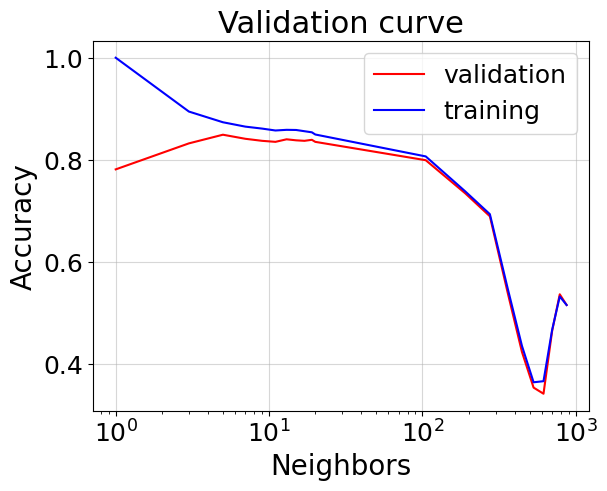

In [11]:
plt.plot([k for (k,mean) in validationScores], [mean for (k,mean) in validationScores], 'r')
plt.plot([k for (k,mean) in trainScores], [mean for (k,mean) in trainScores], 'b')
plt.semilogx()
plt.grid(alpha = 0.5)
plt.title("Validation curve")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.legend(["validation", "training"])
plt.show()

## Q3

In [12]:
fiveNN = KNN(5)
fiveNN.fit(partOneTemp, trainDataset["spread"])
fiveNN.score(testDataset[["PCR_01","PCR_03"]], testDataset["spread"])

0.86

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


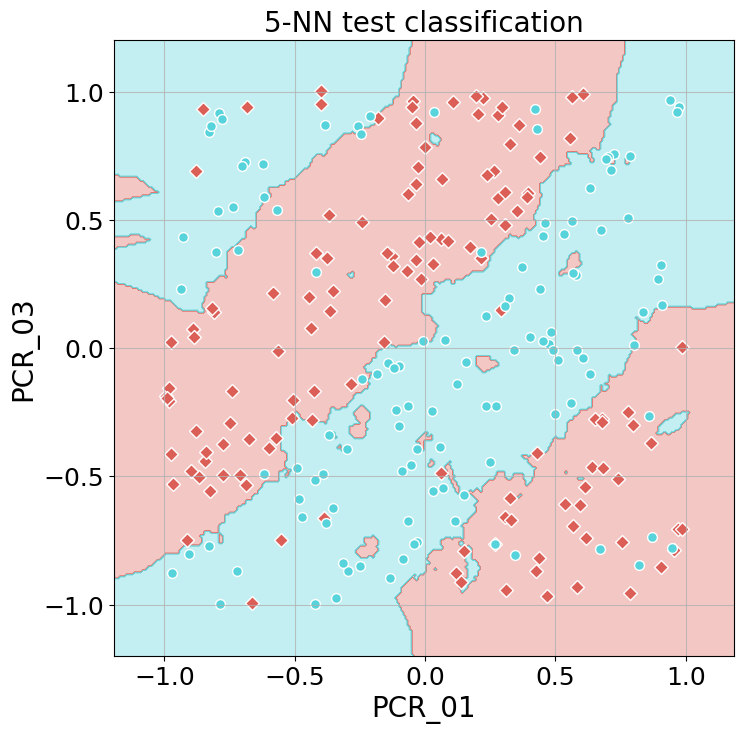

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


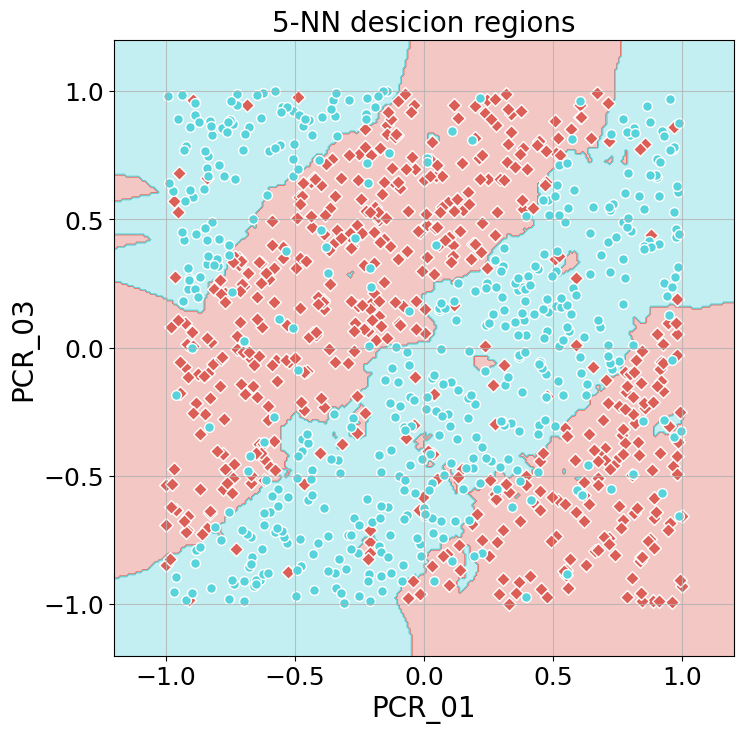

In [13]:

visualize_clf(fiveNN, testDataset[["PCR_01","PCR_03"]], testDataset["spread"], "5-NN test classification", "PCR_01", "PCR_03")

visualize_clf(fiveNN, partOneTemp, trainDataset["spread"], "5-NN desicion regions", "PCR_01", "PCR_03")

# Part 2

## Q5

In [14]:
ourTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
trainSetNoTargets = trainDataset.drop(['spread','risk'], axis = 1) #Removed spread and risk. The fact we hadn't removed them before might be a problem.
ourTree.fit(trainSetNoTargets, trainDataset["risk"])
ourTree.score(trainSetNoTargets, trainDataset["risk"])

0.696

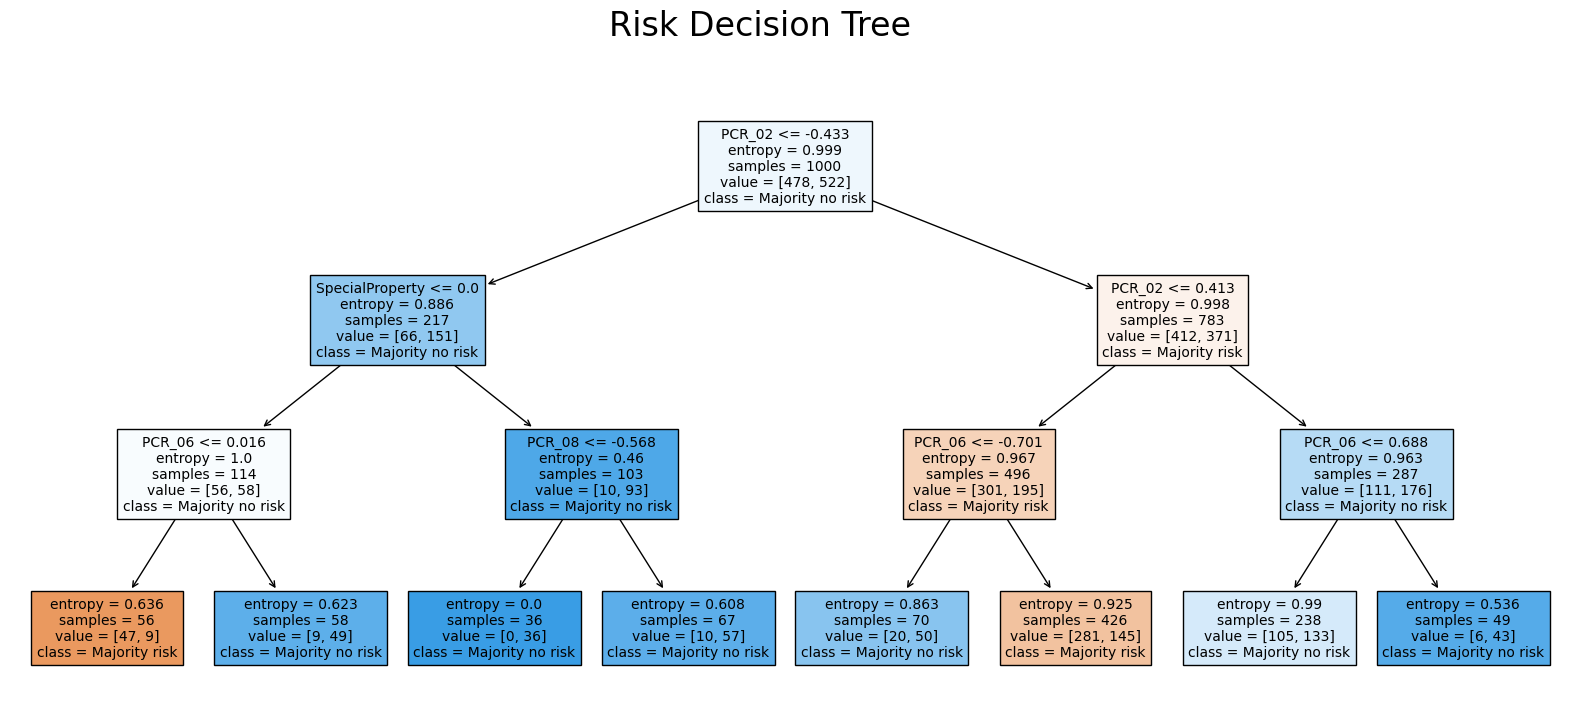

In [15]:
plt.figure(figsize = (20,8))
plt.suptitle("Risk Decision Tree")
plot_tree(ourTree, filled = True, feature_names = trainSetNoTargets.columns, fontsize = 10, class_names = ["Majority risk", "Majority no risk"])
pass

## Q6

In [16]:

depths = list(range(1, 80, 4))
minSamples = list(range(1,30 , 2))

#TreeEstimators = [DecisionTreeClassifier(criterion = "entropy", max_depth = depth, min_samples_leaf= min) for (depth, min) in cartesian_depth_min]

grid = GridSearchCV(DecisionTreeClassifier(criterion = "entropy"), {"max_depth": depths, "min_samples_leaf": minSamples}, cv=5, return_train_score = True)
grid.fit(trainSetNoTargets, trainDataset["risk"])
print(grid.best_params_)
print(grid.best_score_)

results = pd.DataFrame(grid.cv_results_)
results.head()


{'max_depth': 77, 'min_samples_leaf': 13}
0.7380000000000001


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006703      0.001310         0.002820        0.000615   
1       0.004886      0.000306         0.001931        0.000060   
2       0.004810      0.000184         0.002088        0.000302   
3       0.004608      0.000038         0.001885        0.000060   
4       0.004704      0.000035         0.001940        0.000046   

  param_max_depth param_min_samples_leaf  \
0               1                      1   
1               1                      3   
2               1                      5   
3               1                      7   
4               1                      9   

                                    params  split0_test_score  \
0  {'max_depth': 1, 'min_samples_leaf': 1}              0.615   
1  {'max_depth': 1, 'min_samples_leaf': 3}              0.615   
2  {'max_depth': 1, 'min_samples_leaf': 5}              0.615   
3  {'max_depth': 1, 'min_samples_leaf': 7}              0.615   
4  {'max_depth': 1, 'min_samples_leaf': 9}              0.615   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0              0.555               0.55  ...             0.56        0.028284   
1              0.555               0.55  ...             0.56        0.028284   
2              0.555               0.55  ...             0.56        0.028284   
3              0.555               0.55  ...             0.56        0.028284   
4              0.555               0.55  ...             0.56        0.028284   

   rank_test_score  split0_train_score  split1_train_score  \
0              286                0.55               0.565   
1              286                0.55               0.565   
2              286                0.55               0.565   
3              286                0.55               0.565   
4              286                0.55               0.565   

   split2_train_score  split3_train_score  split4_train_score  \
0              0.5625              0.5675                0.57   
1              0.5625              0.5675                0.57   
2              0.5625              0.5675                0.57   
3              0.5625              0.5675                0.57   
4              0.5625              0.5675                0.57   

   mean_train_score  std_train_score  
0             0.563         0.006964  
1             0.563         0.006964  
2             0.563         0.006964  
3             0.563         0.006964  
4             0.563         0.006964  

[5 rows x 22 columns]

<ipython-input-17-4605193bbe42>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  trainHeatMapData = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_train_score')
<ipython-input-17-4605193bbe42>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  trainHeatMapData = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_train_score')
<ipython-input-17-4605193bbe42>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')
<ipython-input-17-4605193bbe42>:3: FutureWarning: In a future version, the Index constr

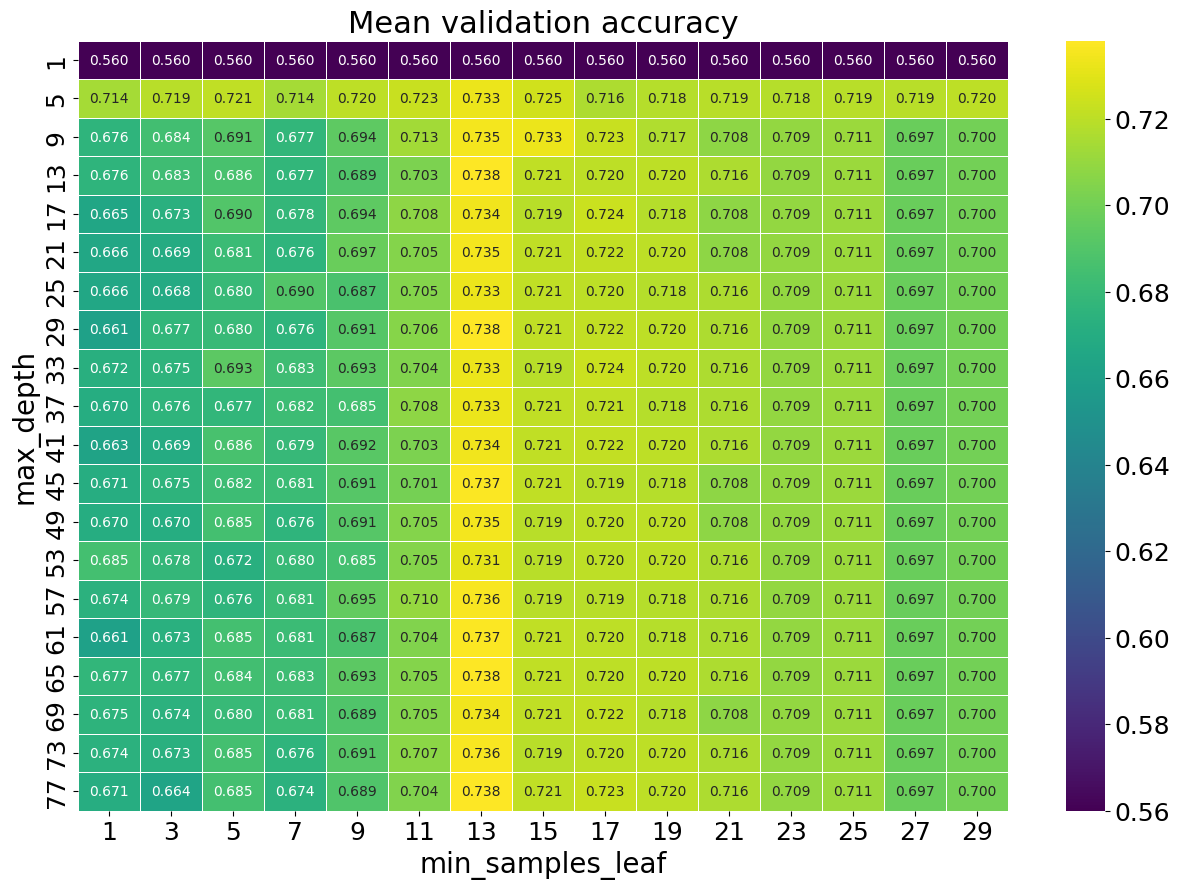

In [17]:
trainHeatMapData = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_train_score')

heatmap_data = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('Mean validation accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()

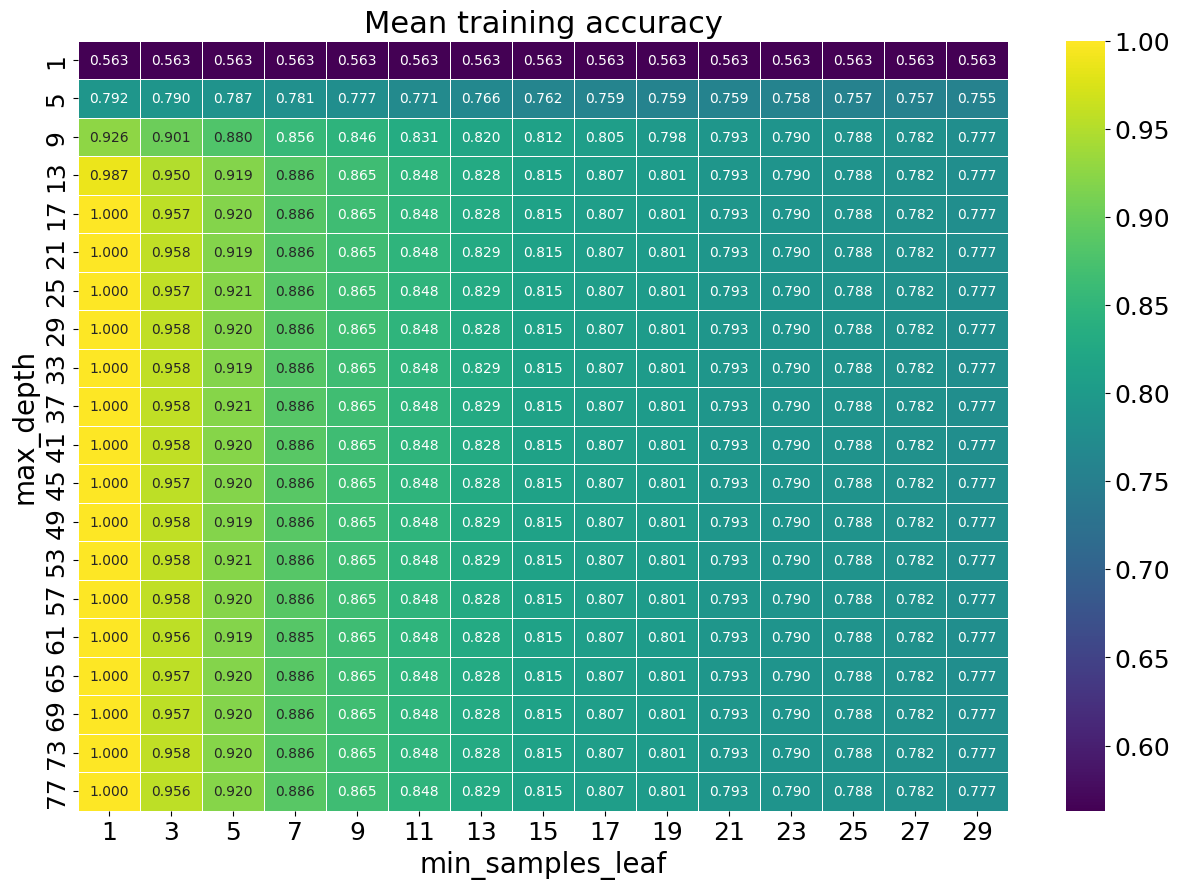

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(trainHeatMapData, annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('Mean training accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()

## Q7

In [19]:
optimaltree = DecisionTreeClassifier(criterion = "entropy", max_depth = grid.best_params_["max_depth"], min_samples_leaf = grid.best_params_["min_samples_leaf"] )
optimaltree.fit(trainSetNoTargets, trainDataset["risk"])
optimaltree.score(testDataset.drop(["risk", "spread"] ,axis = 1), testDataset["risk"])

0.736

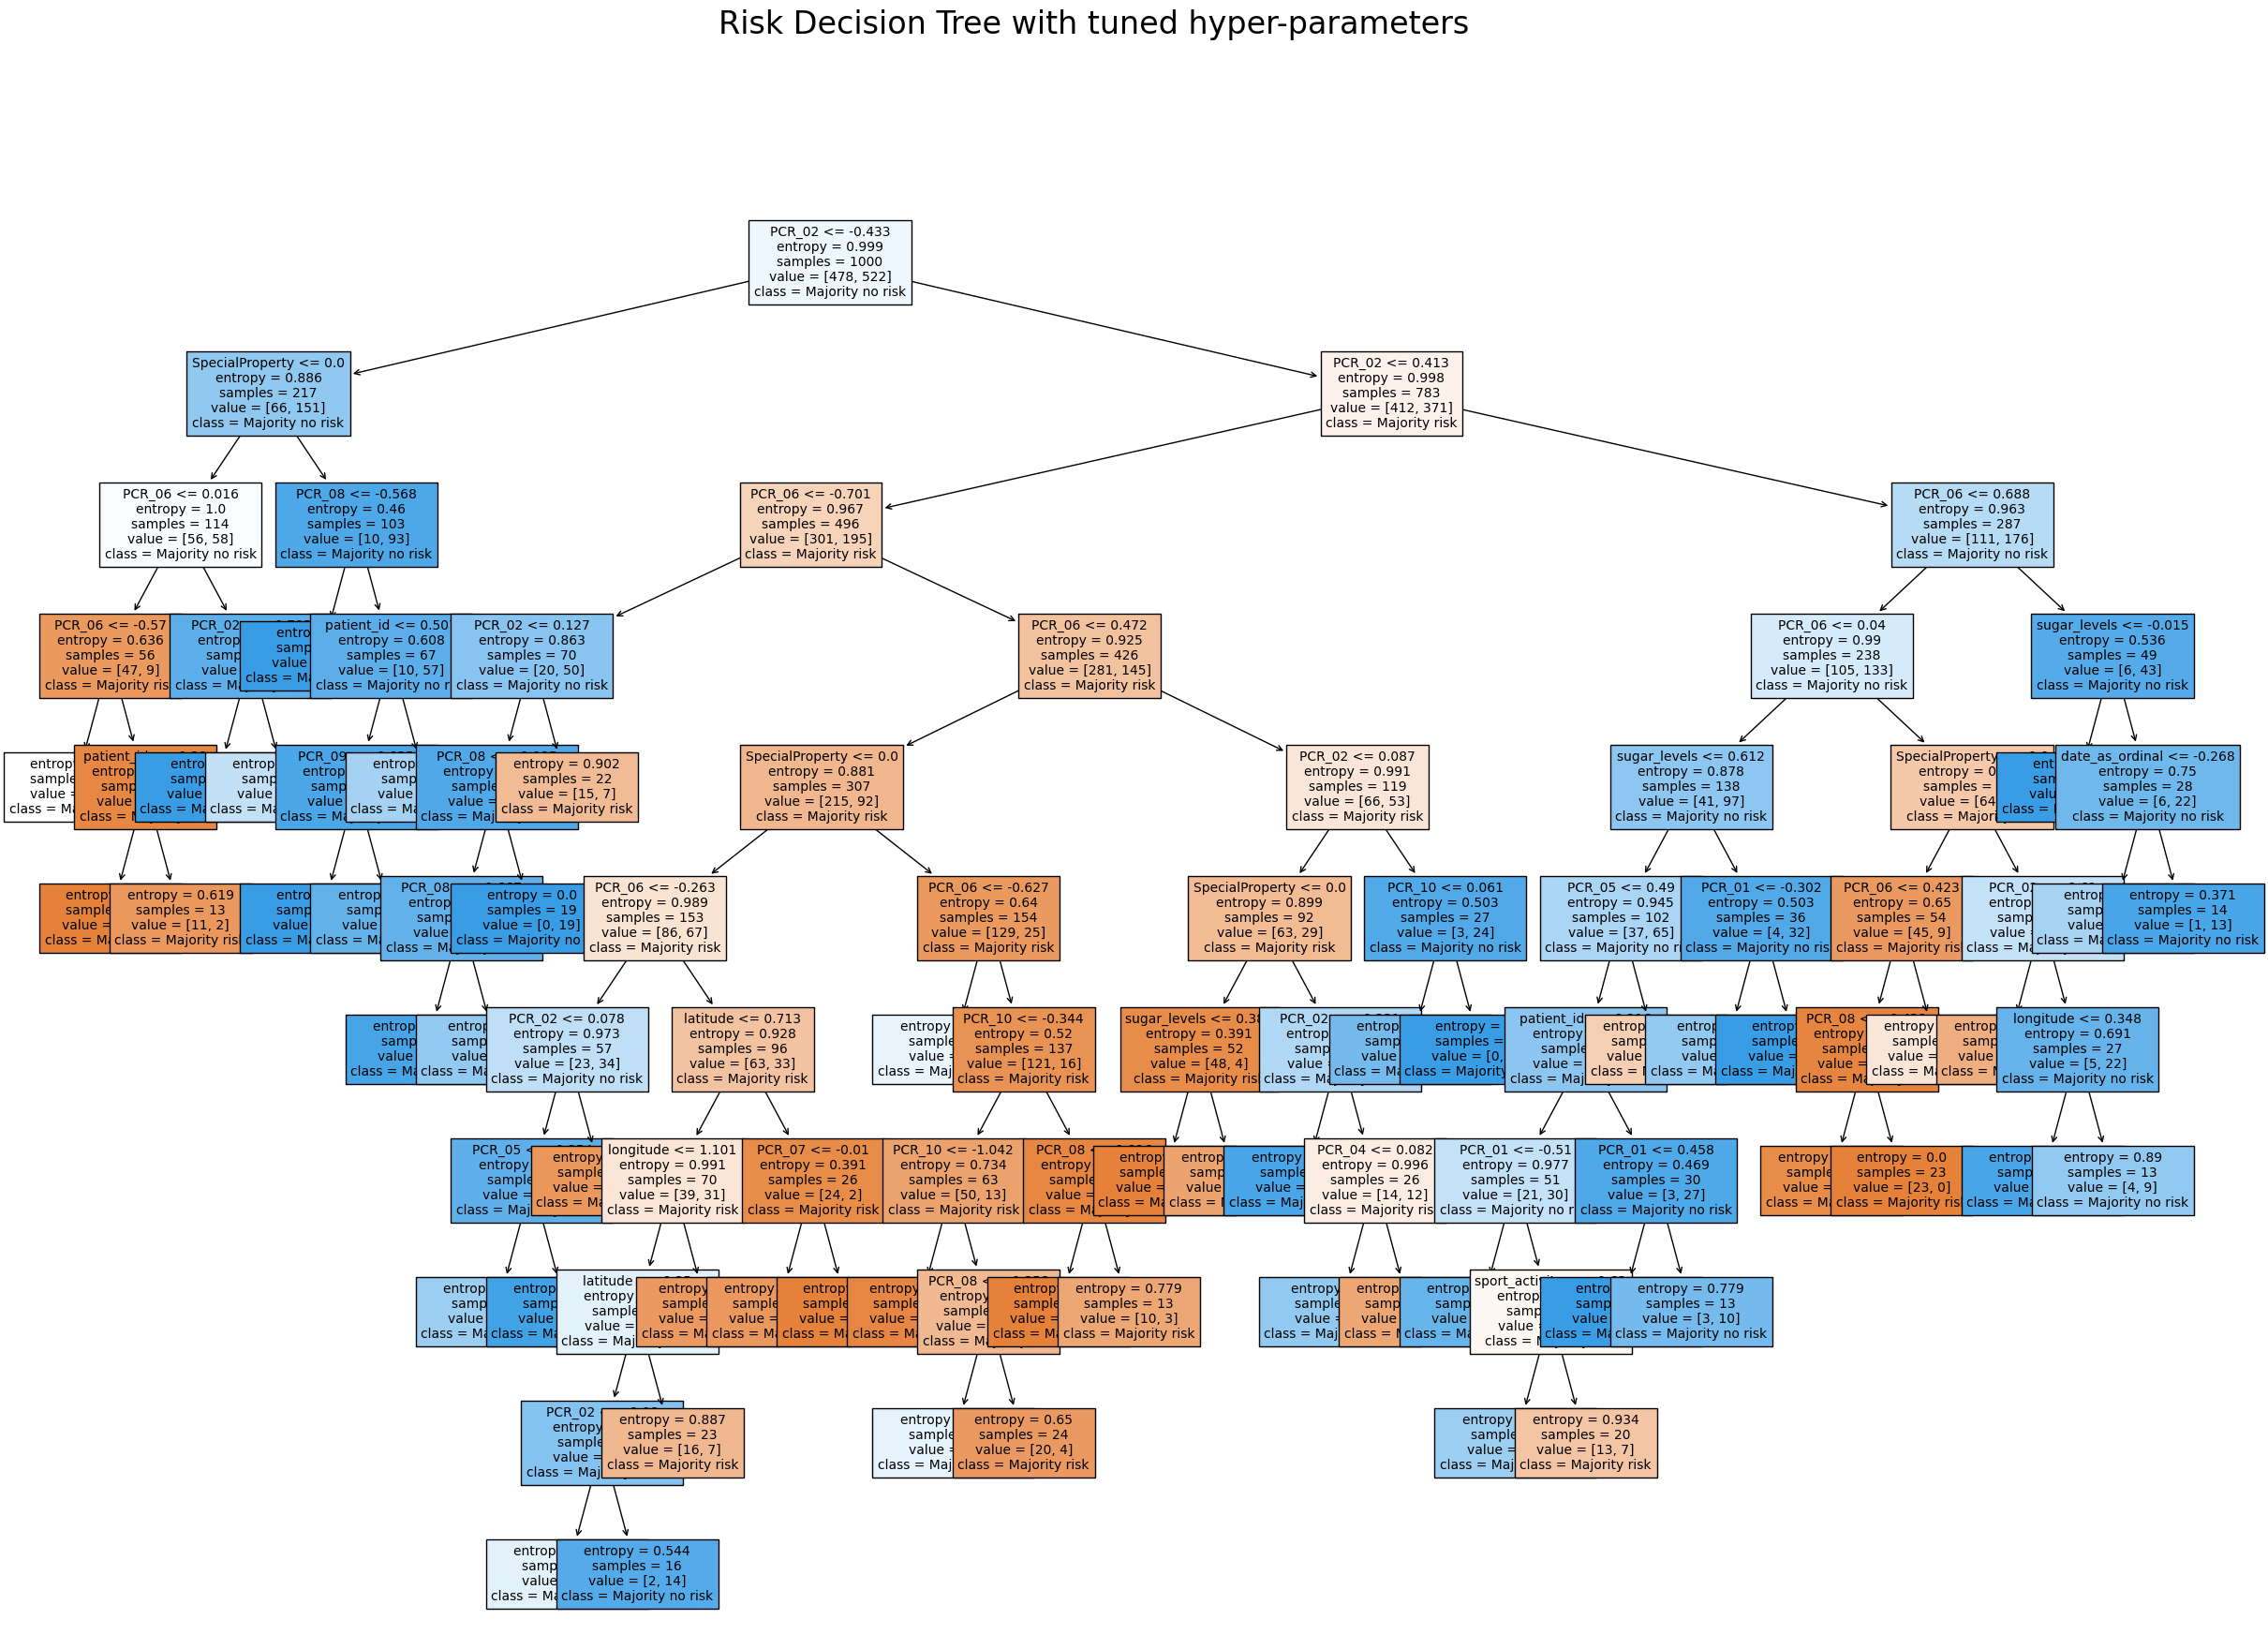

In [20]:
plt.figure(figsize = (30,20))
plt.suptitle("Risk Decision Tree with tuned hyper-parameters")
plot_tree(optimaltree, filled = True, feature_names = trainSetNoTargets.columns, fontsize = 10, class_names = ["Majority risk", "Majority no risk"])
pass

# Part 3

## verify_gradients

In [21]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


## SoftSVM code

In [22]:
m = np.matrix([[1,2,3],[1,2,3]])
m2 = np.matrix([1,0,0])
print((m.dot(m2.reshape(-1,1)))+5)

a = np.array([2,3]).reshape(-1, 1)

np.sum(np.multiply(m,a), axis = 0)

[[6]
 [6]]


matrix([[ 5, 10, 15]])

In [23]:
        z=np.array([1,54,3,0.5,0.6,-5,-3])
        z[z < 1] = -1
        z[z >= 1] = 0
        z



array([ 0.,  0.,  0., -1., -1., -1., -1.])

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """

        margins = (X.dot(w) + b).reshape(-1, 1) #.dot() should return a np.matryx see above.
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        normSquared = np.linalg.norm(w)**2

        realHinges = np.maximum(0, 1 - hinge_inputs)
        hingesSum = np.sum(realHinges)
        return C*hingesSum + normSquared

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        #print("margins shape= ", margins.shape)
        z = np.multiply(margins,y.reshape(-1, 1))
        #print("z shape= ", z.shape)
        z[z < 1] = -1
        z[z >= 1] = 0
        #print("f shape= ", z.shape)
        FY = np.multiply(z, y.reshape(-1, 1))
        #print("FY shape = ", FY.shape)
        summand = np.multiply(FY.reshape(-1, 1), X)

        g_w = 2*w + C*np.sum(summand, axis = 0)
        g_b = C*(np.sum(FY))
        return g_w, g_b



    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)  #This may be a bug. Because we didn't average on the size of the batch...

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign(np.dot(X, self.w) + self.b)

        return y_pred


In [25]:
permutation = [2,1,0]
M = np.matrix([[-1,-2,-3,4], [5,5,5,5], [1,1,1,1]])
M[permutation, : ]

matrix([[ 1,  1,  1,  1],
        [ 5,  5,  5,  5],
        [-1, -2, -3,  4]])

## Q9

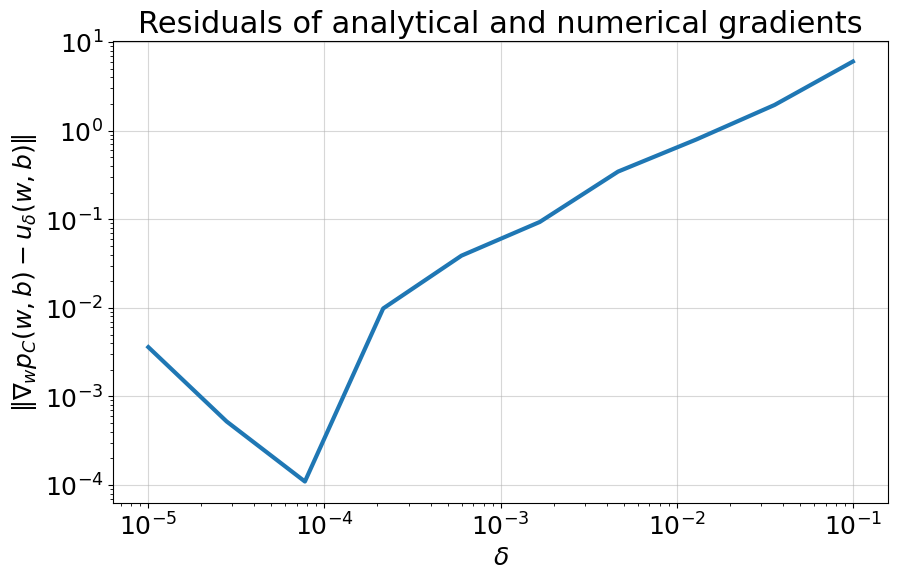

In [26]:
partThreeTemp = trainDataset[["PCR_01", "PCR_03"]]
compare_gradients(partThreeTemp.to_numpy(), trainDataset["spread"].to_numpy(), deltas=np.logspace(-5, -1, 10))

[-0.01466061  0.0157795 ]
-0.9880000000000007


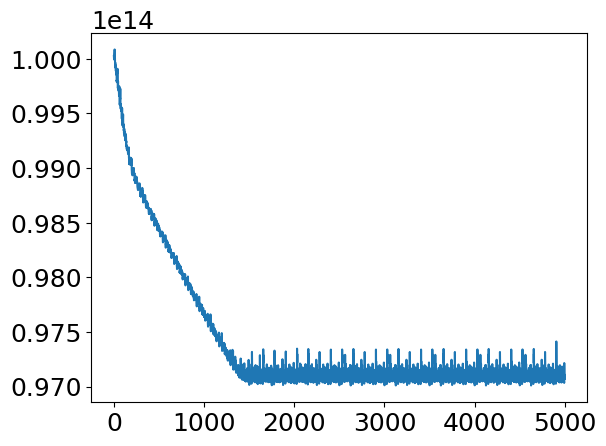

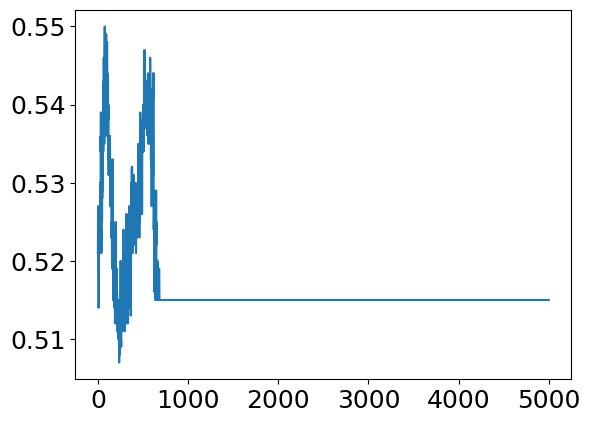

In [27]:
owrSVM = SoftSVM(1e11, 2e-14)
losses, accuracies = owrSVM.fit_with_logs(partThreeTemp.to_numpy(), trainDataset["spread"].to_numpy(), 5000)
print(owrSVM.w)
print(owrSVM.b)
plt.plot(losses)
plt.show()
plt.plot(accuracies)
plt.show()

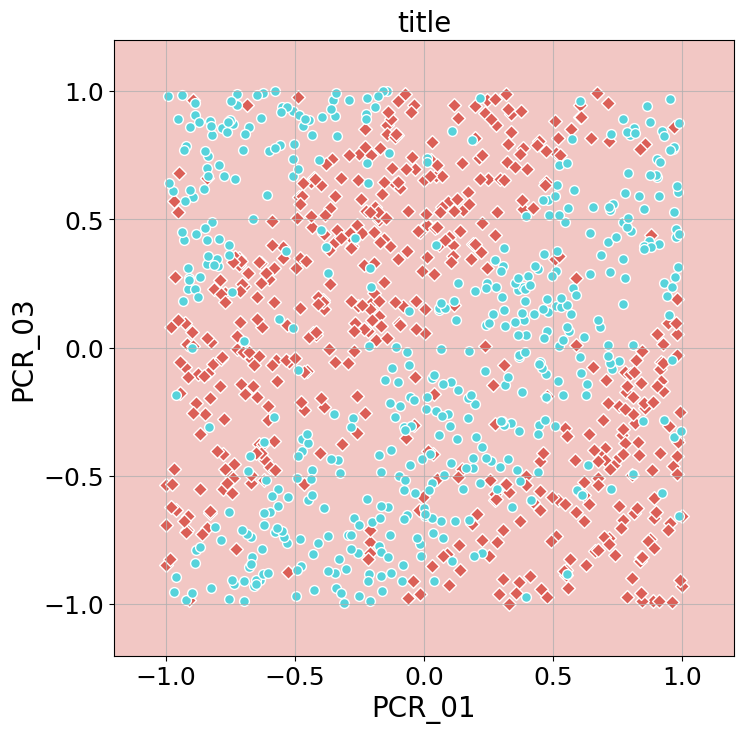

In [28]:
visualize_clf(owrSVM, partThreeTemp.to_numpy(), trainDataset["spread"].to_numpy(), "title", "PCR_01", "PCR_03")

## Q11

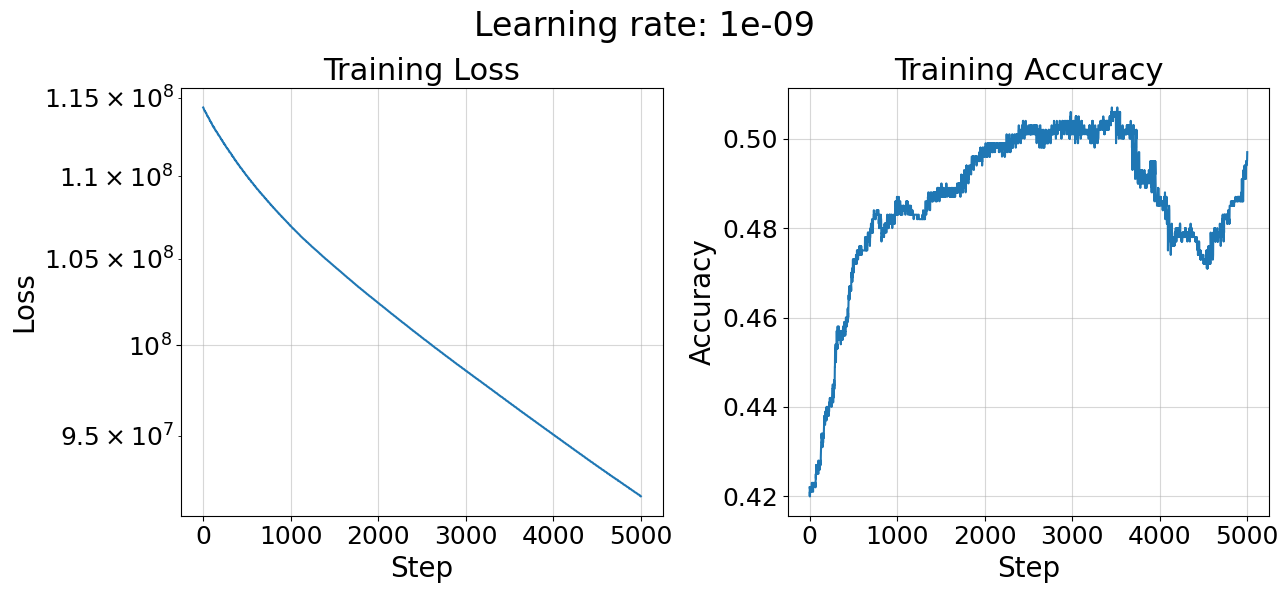

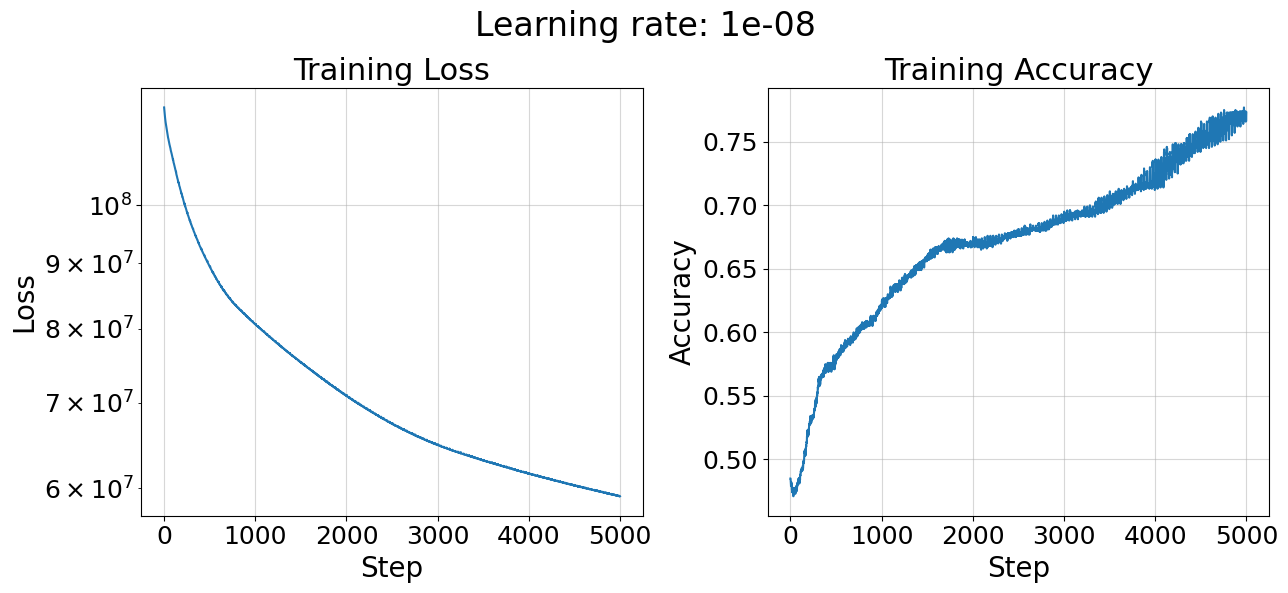

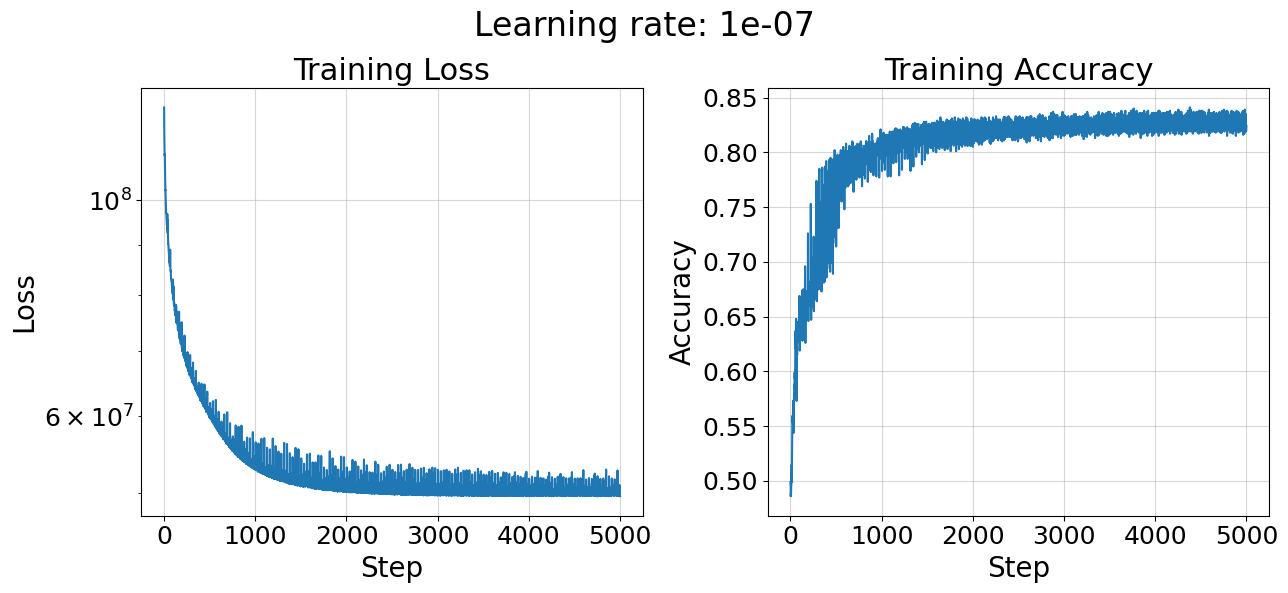

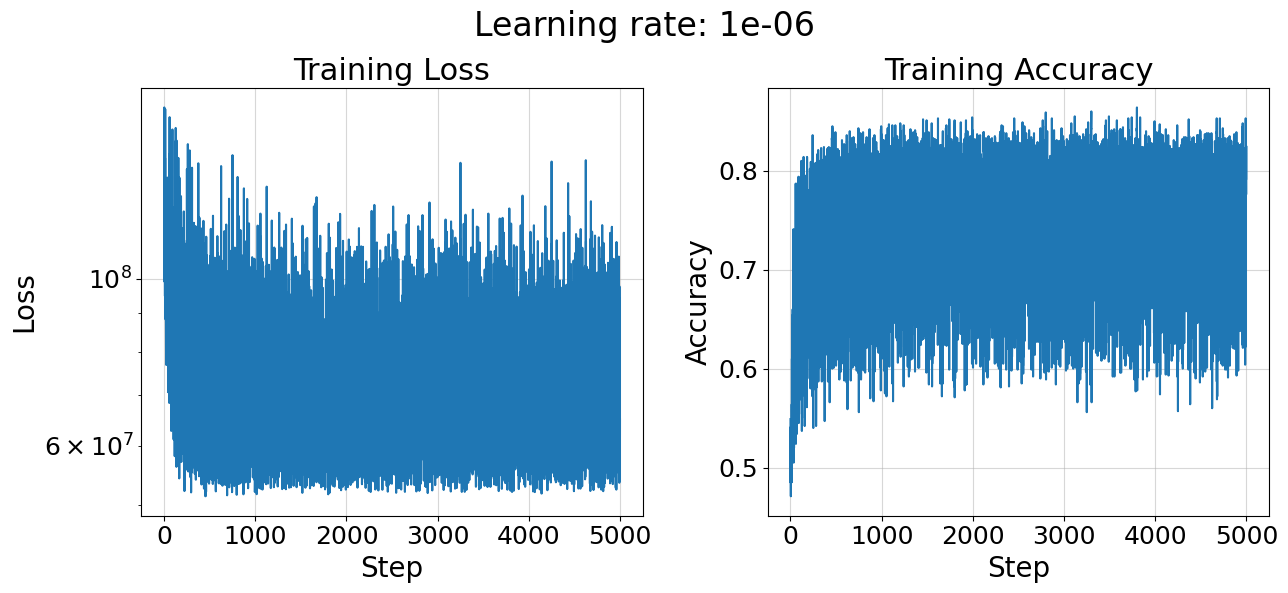

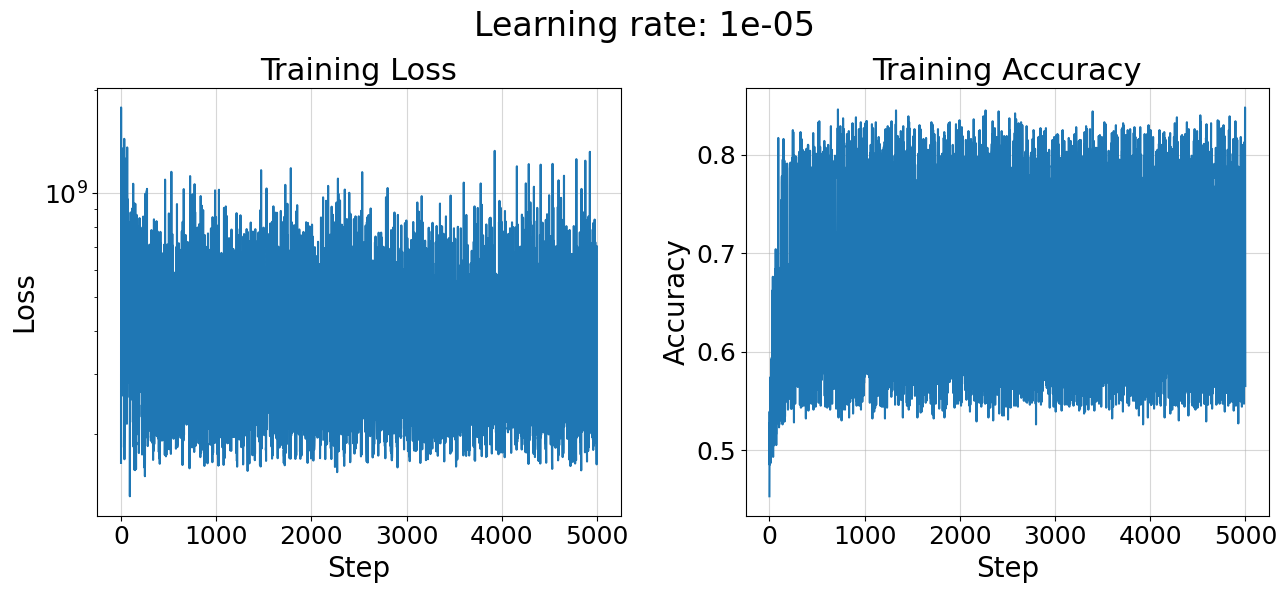

In [29]:
C=1e5
for lr in np.logspace(-9, -5, 5) :
  clf = SoftSVM(C=C, lr=lr)
  Xtrain_poly = PolynomialFeatures(degree=3,).fit_transform(partThreeTemp)
  Xtrain_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(Xtrain_poly)
  losses, accuracies = clf.fit_with_logs(Xtrain_poly, trainDataset["spread"].to_numpy(), max_iter=5000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss")
  plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy")
  plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.subplots_adjust(top=0.85)
  plt.suptitle("Learning rate: " + str(lr))
  plt.show()


## Q12

In [30]:
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)), ('scaler', MinMaxScaler()), ('SVM', SoftSVM(C=1e5, lr=1e-7))])
svm_clf.fit(partThreeTemp, trainDataset["spread"].to_numpy(), SVM__max_iter=5000)
pass

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


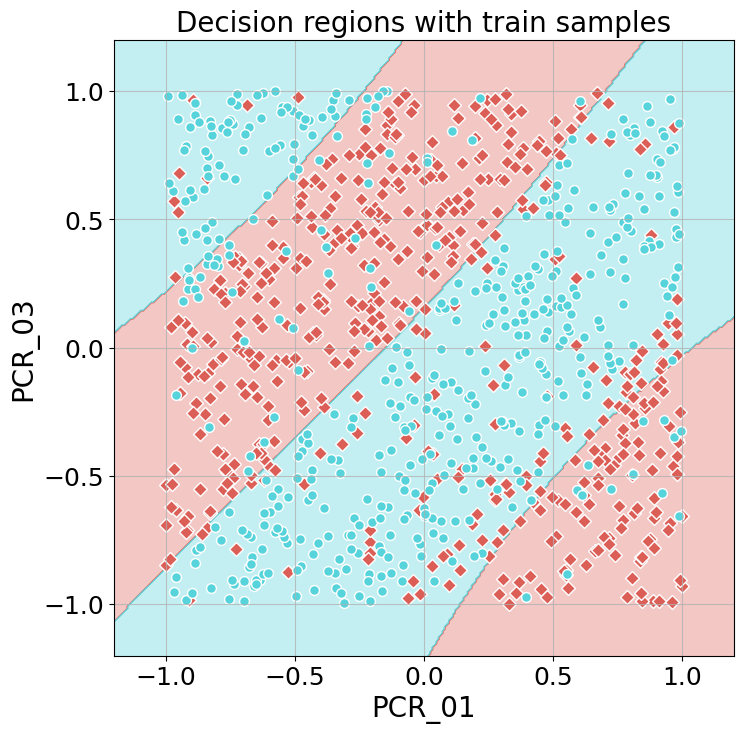

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Train accuracy:  0.807


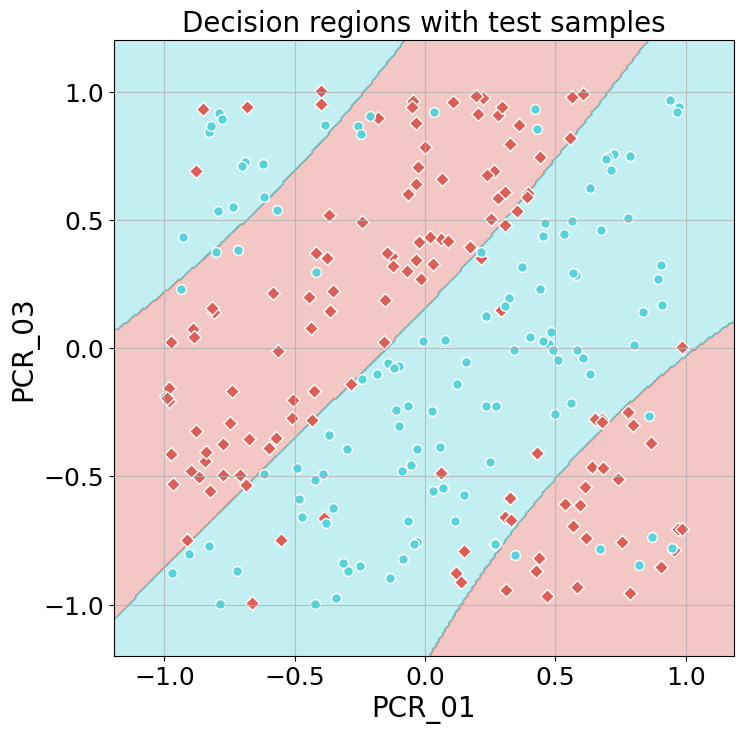

Test accuracy:  0.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [31]:
visualize_clf(svm_clf, partThreeTemp.to_numpy(), trainDataset["spread"].to_numpy(), "Decision regions with train samples", "PCR_01", "PCR_03")
print("Train accuracy: ", svm_clf.score(partThreeTemp.to_numpy(), trainDataset["spread"].to_numpy()))
visualize_clf(svm_clf, testDataset[["PCR_01","PCR_03"]].to_numpy(), testDataset["spread"].to_numpy(), "Decision regions with test samples", "PCR_01", "PCR_03")
print("Test accuracy: ", svm_clf.score(testDataset[["PCR_01","PCR_03"]].to_numpy(), testDataset["spread"].to_numpy()))

# Part 4

##Q14

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


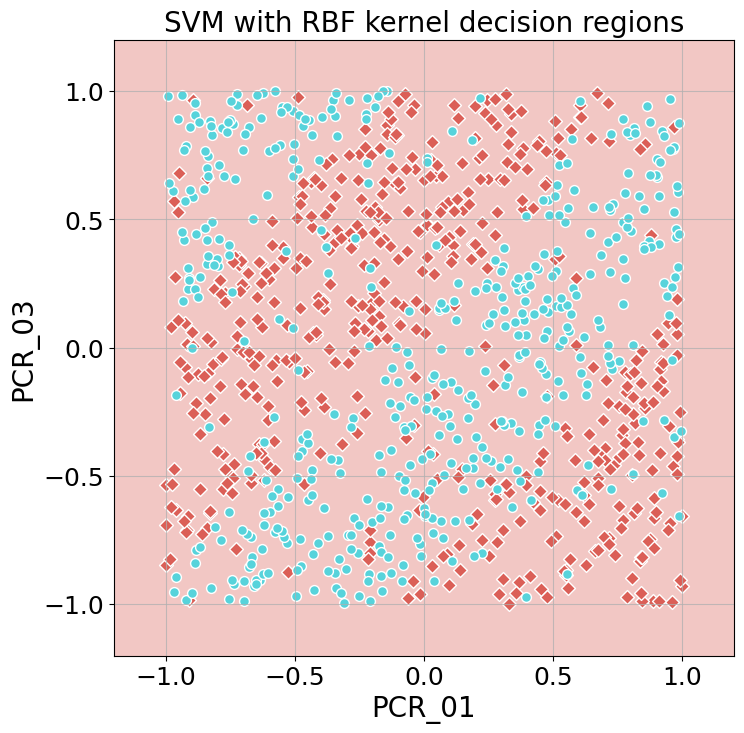

In [35]:
notOurSVM = SVC(C = 1, kernel = 'rbf', gamma = 1e-7)
notOurSVM.fit(partThreeTemp, trainDataset["spread"])
visualize_clf(notOurSVM, partThreeTemp, trainDataset["spread"], "SVM with RBF kernel decision regions", "PCR_01", "PCR_03")

In [36]:
notOurSVM.dual_coef_

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


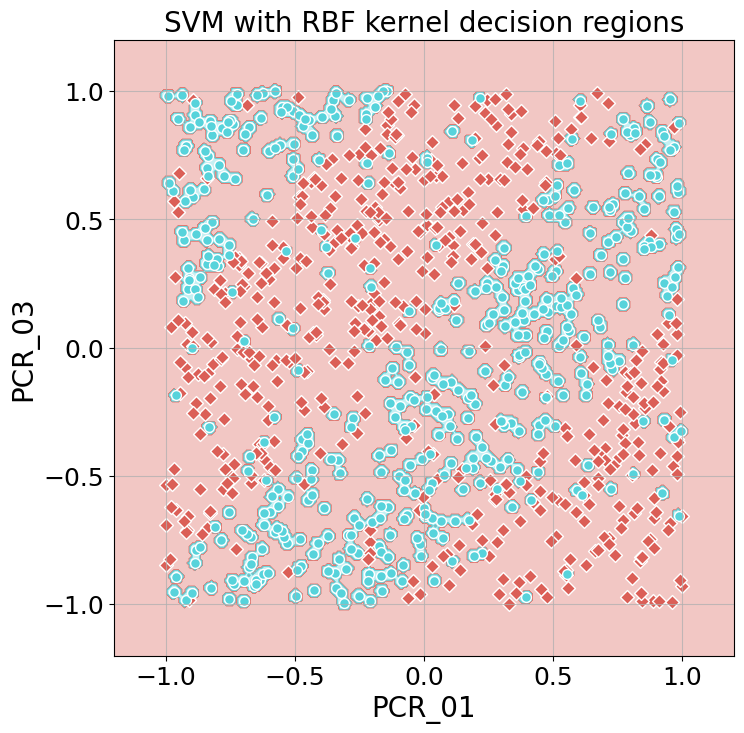

In [46]:
notOurSVM = SVC(C = 1, kernel = 'rbf', gamma = 5000)
notOurSVM.fit(partThreeTemp, trainDataset["spread"])
visualize_clf(notOurSVM, partThreeTemp, trainDataset["spread"], "SVM with RBF kernel decision regions", "PCR_01", "PCR_03")

In [47]:
notOurSVM.dual_coef_

array([[-0.96592426, -0.96353364, -1.        , -0.96476539, -0.56830521,
        -0.91705402, -0.96485046, -0.96480392, -0.95987522, -0.76768932,
        -0.96587212, -0.95985367, -0.84120949, -0.96646798, -0.81702409,
        -0.71225411, -1.        , -0.91216072, -0.49756873, -0.96564596,
        -0.96049035, -0.96514841, -0.60167204, -0.96551175, -0.94808443,
        -0.96544644, -0.83361061, -0.96512698, -1.        , -0.52375463,
        -0.96559757, -0.96203128, -0.96564674, -0.48134306, -0.93593917,
        -0.96895228, -0.96506137, -0.93021662, -0.9652018 , -0.96371138,
        -0.74885799, -1.        , -1.        , -0.92885687, -0.96520508,
        -1.        , -0.97189217, -0.94973885, -0.90812651, -0.92654125,
        -0.86351218, -0.95501147, -0.96521308, -0.9653931 , -0.90929224,
        -0.98392419, -0.94294643, -0.48600577, -0.96332442, -0.85387063,
        -0.92983116, -0.97446563, -1.        , -1.        , -0.88332994,
        -0.96717003, -0.96564237, -0.86568532, -0.9

In [54]:
test = pd.DataFrame()
test["PCR_01"] = [-2,2]
test["PCR_03"] = [-2,2]

notOurSVM.decision_function(testDataset[["PCR_01", "PCR_03"]])

array([-0.03467041, -0.15909121, -0.12927766, -0.03872795, -0.03468056,
       -0.02842654, -0.03653092, -0.03462632, -0.1038466 , -0.03467483,
       -0.03467116, -0.03466979,  0.02651669, -0.03467053, -0.03465265,
       -0.0346236 , -0.03485999, -0.23470439, -0.03467746, -0.05923734,
       -0.03427913, -0.03467608, -0.0346704 , -0.0346704 , -0.03340478,
       -0.03467072, -0.05680866, -0.00529751, -0.05657612, -0.01379935,
       -0.08103843, -0.03397904, -0.01107665, -0.40265929, -0.40871067,
       -0.06120711, -0.03467064, -0.03441359, -0.03352674, -0.0346704 ,
       -0.03467161, -0.03254109, -0.03540271, -0.03600316,  0.46956943,
       -0.03467045, -0.25634485, -0.06510159, -0.0347352 ,  0.22166392,
        0.44311614, -0.03773395, -0.03488549, -0.1260128 , -0.0346704 ,
       -0.03547153, -0.03311945, -0.03466448, -0.03681177, -0.37575056,
       -0.0346704 , -0.02981475, -0.03457004, -0.03467017,  0.7605148 ,
        0.13537469,  0.02793005, -0.18643361, -0.21029631, -0.03

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


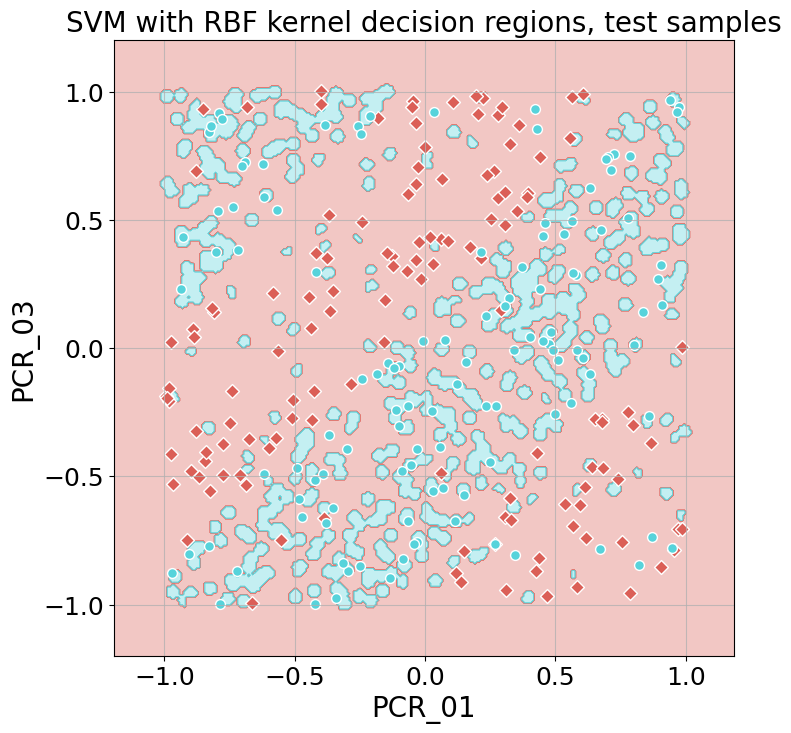

In [55]:
visualize_clf(notOurSVM, testDataset[["PCR_01", "PCR_03"]], testDataset["spread"], "SVM with RBF kernel decision regions, test samples", "PCR_01", "PCR_03")

#Part 5

## Q16

In [ ]:
partFiveTrain = trainDataset.loc[trainDataset['SpecialProperty'] == -1]
partFiveTrain = partFiveTrain[["PCR_02", "PCR_06", "risk"]]

partFiveTest = testDataset.loc[testDataset['SpecialProperty'] == -1]
partFiveTest = partFiveTest[["PCR_02", "PCR_06", "risk"]]
pass

Text(0.5, 1.3, 'PCR_02 vs. PCR_06 plot colored by risk\nfor non-special blood types')

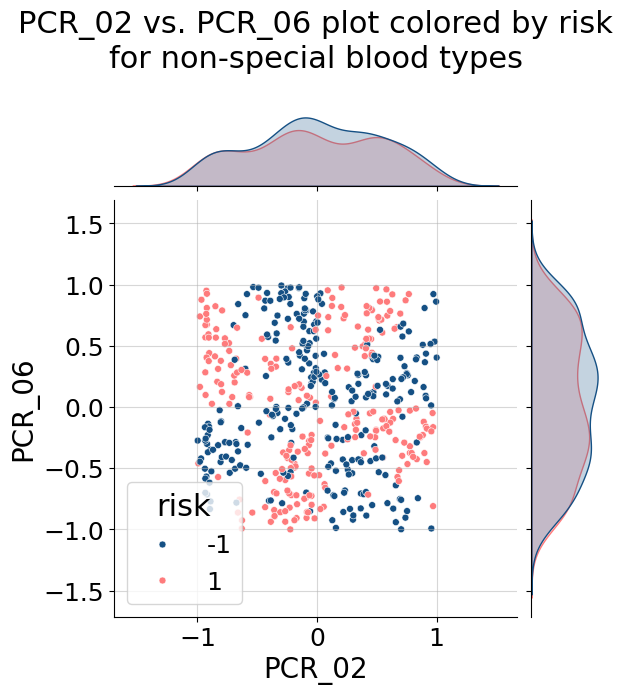

In [ ]:
sns.jointplot(partFiveTrain, x="PCR_02", y="PCR_06", hue="risk", s=25,
              palette=[sns.xkcd_rgb['light navy'],sns.xkcd_rgb['salmon pink']])
plt.grid(alpha = 0.5)

plt.title("PCR_02 vs. PCR_06 plot colored by risk\nfor non-special blood types", y=1.3)

## Task

Creating a new datasets, this time with polar features (radius/angle)

In [ ]:
polarTrain = pd.DataFrame()
polarTrain["angle"] = np.arctan2(partFiveTrain["PCR_06"], partFiveTrain["PCR_02"])
polarTrain["radiuse"] = np.hypot(partFiveTrain["PCR_06"], partFiveTrain["PCR_02"])
polarTrain["risk"] = partFiveTrain["risk"]

polarTest = pd.DataFrame()
polarTest["angle"] = np.arctan2(partFiveTest["PCR_06"], partFiveTest["PCR_02"])
polarTest["radiuse"] = np.hypot(partFiveTest["PCR_06"], partFiveTest["PCR_02"])
polarTest["risk"] = partFiveTest["risk"]

In [ ]:
print(polarTrain.shape)
print(polarTest.shape)

(519, 3)
(133, 3)


## Q17

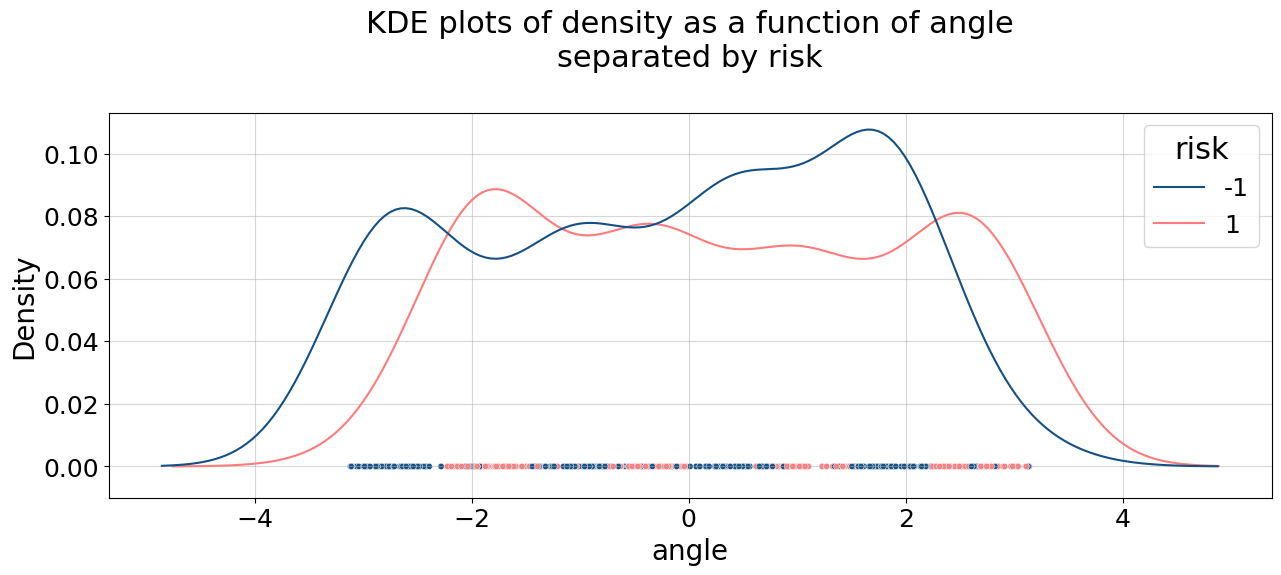

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=polarTrain, x='angle', y=[0]*polarTrain.shape[0], hue='risk', s=20, palette=[sns.xkcd_rgb['light navy'],sns.xkcd_rgb['salmon pink']])
sns.kdeplot(data= polarTrain, x='angle', hue='risk', common_norm=True, fill=False, palette=[sns.xkcd_rgb['light navy'],sns.xkcd_rgb['salmon pink']])
plt.ylim(bottom=-1e-2)
plt.title("KDE plots of density as a function of angle\nseparated by risk", y=1.1)
plt.grid(alpha=0.5)

## Q18

Text(0.5, 1.3, 'Joint plot of angle and sin_angle features\ncolored by risk')

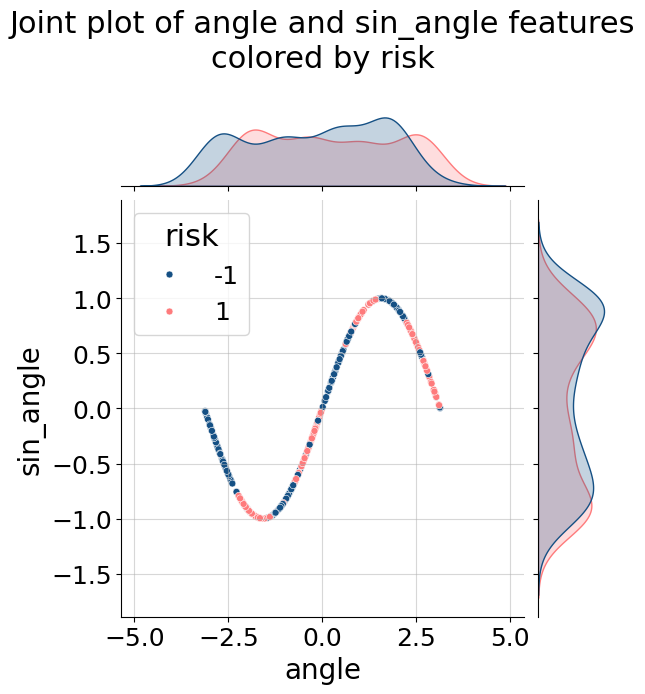

In [ ]:

beta=1
polarTrain['sin_angle'] = np.sin(beta*polarTrain['angle'])
sns.jointplot(polarTrain, x="angle", y="sin_angle", hue="risk", s=25,
              palette=[sns.xkcd_rgb['light navy'],sns.xkcd_rgb['salmon pink']])
plt.grid(alpha = 0.5)

plt.title("Joint plot of angle and sin_angle features\ncolored by risk", y=1.3)


## Q19

In [ ]:
class Sin(BaseEstimator, TransformerMixin):
  def __init__(self, beta = 1):
    self.beta = beta

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    Xcopy = X.copy()
    Xcopy['sin_angle'] = np.sin(self.beta*X['angle'])
    return Xcopy

In [ ]:
pipe = Pipeline([("Sin", Sin()), ("scaler", MinMaxScaler((-1,1))), ('SVM', SVC(kernel = 'linear'))])
param = {"SVM__C":[n/10 for n in list(range(10,100,10))]+list(range(1,15,1)), "Sin__beta":[n/10 for n in list(range(30,50,1))]}
linearSVM = GridSearchCV(pipe, param, scoring="accuracy")
linearSVM.fit(polarTrain[["angle"]], polarTrain["risk"])

bestBeta = linearSVM.best_params_["Sin__beta"]
bestC = linearSVM.best_params_["SVM__C"]
linearSVM.best_params_

{'SVM__C': 13, 'Sin__beta': 4.1}

Train score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Train Score:  0.861271676300578


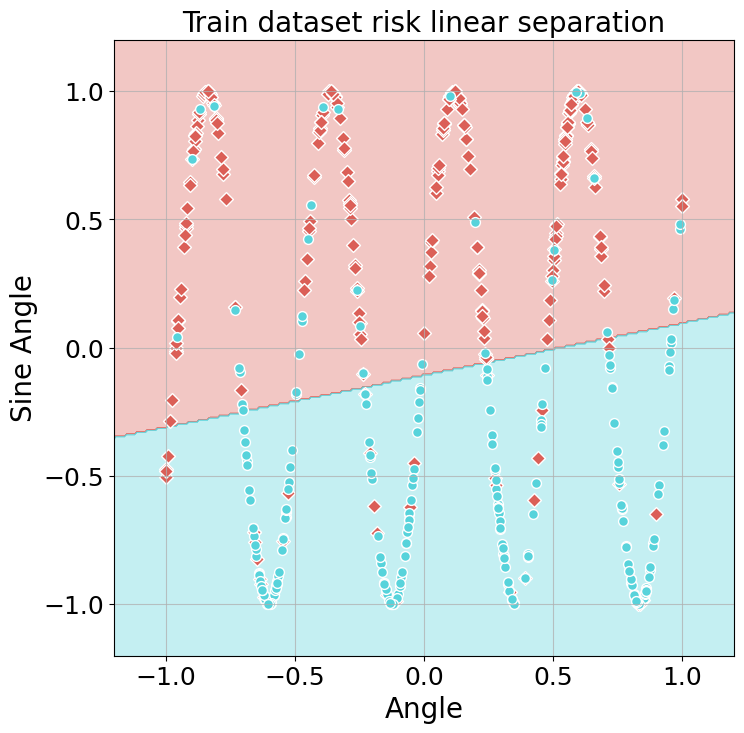

In [ ]:
linearSVM.best_estimator_.fit(polarTrain[["angle"]], polarTrain["risk"])
polarTrain['sin_angle'] = np.sin(bestBeta*polarTrain['angle'])
scaler = MinMaxScaler((-1,1))
normalizedPolarTrain = polarTrain.copy()
normalizedPolarTrain[["angle","sin_angle"]] = scaler.fit_transform(polarTrain[["angle","sin_angle"]])
print("Train Score: ", linearSVM.best_estimator_["SVM"].score(normalizedPolarTrain[["angle","sin_angle"]], normalizedPolarTrain["risk"]))
visualize_clf(linearSVM.best_estimator_["SVM"], normalizedPolarTrain[["angle","sin_angle"]], normalizedPolarTrain["risk"], "Train dataset risk linear separation", "Angle", "Sine Angle")

Test Score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Test Score:  0.8646616541353384


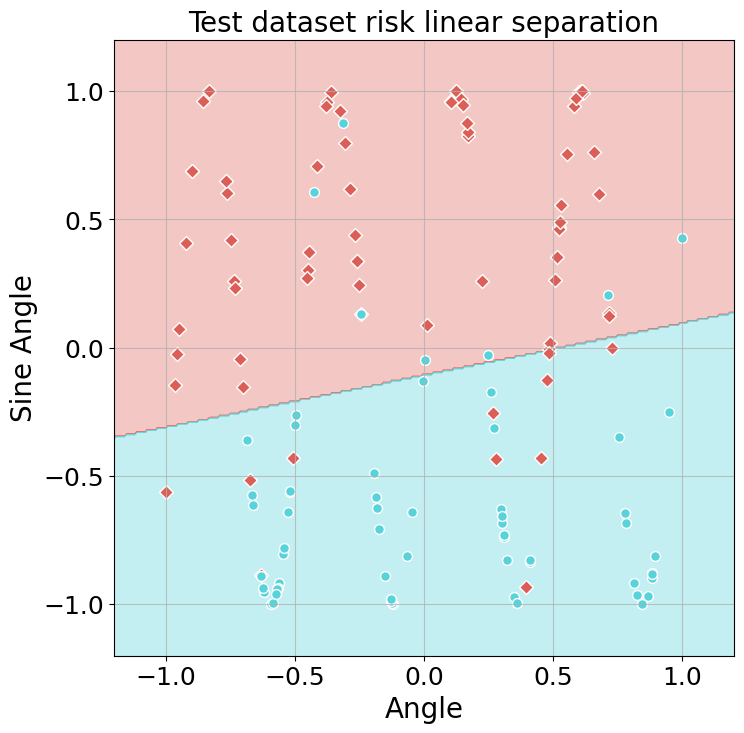

In [ ]:
#linearSVM.best_estimator_.fit(polarTest[["angle"]], polarTest["risk"])
polarTest['sin_angle'] = np.sin(bestBeta*polarTest['angle'])
scaler = MinMaxScaler((-1,1))
normalizedPolarTest = polarTest.copy()
normalizedPolarTest[["angle","sin_angle"]] = scaler.fit_transform(polarTest[["angle","sin_angle"]])
print("Test Score: ", linearSVM.best_estimator_["SVM"].score(normalizedPolarTest[["angle","sin_angle"]], normalizedPolarTest["risk"]))
visualize_clf(linearSVM.best_estimator_["SVM"], normalizedPolarTest[["angle","sin_angle"]], normalizedPolarTest["risk"], "Test dataset risk linear separation", "Angle", "Sine Angle")

The end.